In [1]:
#Imports
import pandas as pd
import wrangle as w
import explore as e
import model as m

# Acquire

In [2]:
df= pd.read_json('data2.json')
df.head()

,repo,language,readme_contents
0,bitcoin/bitcoin,C++,Bitcoin Core integration/staging tree\n=======...
1,bitcoinbook/bitcoinbook,AsciiDoc,Code Examples: ![travis_ci](https://travis-ci....
2,bitcoinj/bitcoinj,Java,image:https://github.com/bitcoinj/bitcoinj/wor...
3,bitcoin/bips,Wikitext,"People wishing to submit BIPs, first should pr..."
4,bitcoinjs/bitcoinjs-lib,TypeScript,# BitcoinJS (bitcoinjs-lib)\n[![Github CI](htt...


# Prepare

In [3]:
df = w.prepare_df(df)
df.head()

,repo,language,readme_contents,readme_contents_clean,length,unique
0,bitcoin/bitcoin,C++,Bitcoin Core integration/staging tree\n=======...,bitcoin core integration staging tree http bit...,3364,27
1,bitcoinj/bitcoinj,Java,image:https://github.com/bitcoinj/bitcoinj/wor...,image http github com bitcoinj bitcoinj workfl...,4642,35
2,spesmilo/electrum,Python,# Electrum - Lightweight Bitcoin client\n\n```...,electrum lightweight bitcoin client licence mi...,4270,36
3,bitcoin-wallet/bitcoin-wallet,Java,# BITCOIN WALLET\n\nWelcome to _Bitcoin Wallet...,bitcoin wallet welcome _bitcoin wallet_ standa...,1317,33
4,etotheipi/BitcoinArmory,C++,##Armory\n\n**Created by Alan Reiner on 13 Jul...,armory created alan reiner 13 july 2011 armory...,4101,38


In [4]:
train, val, test = w.train_val_test(df, stratify= 'language')

# Explore

#### 1. What are the most common words in READMEs?

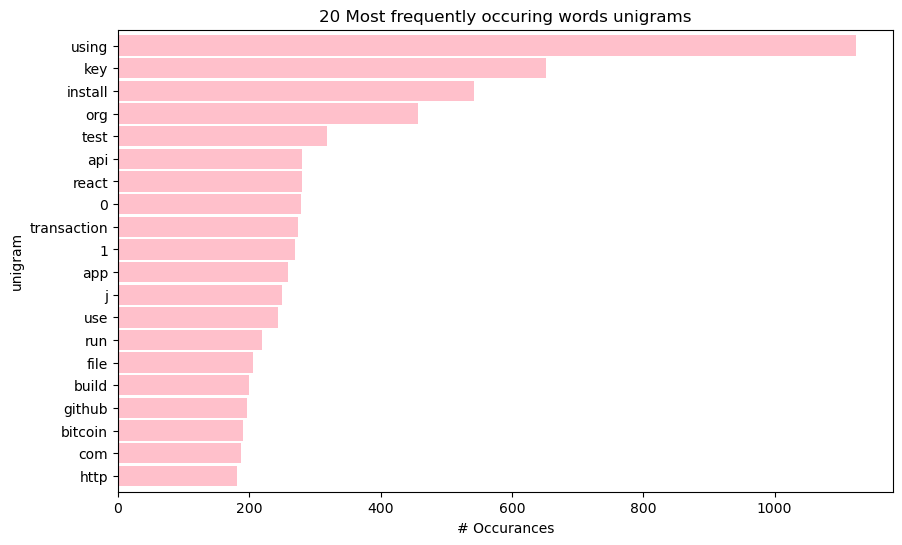

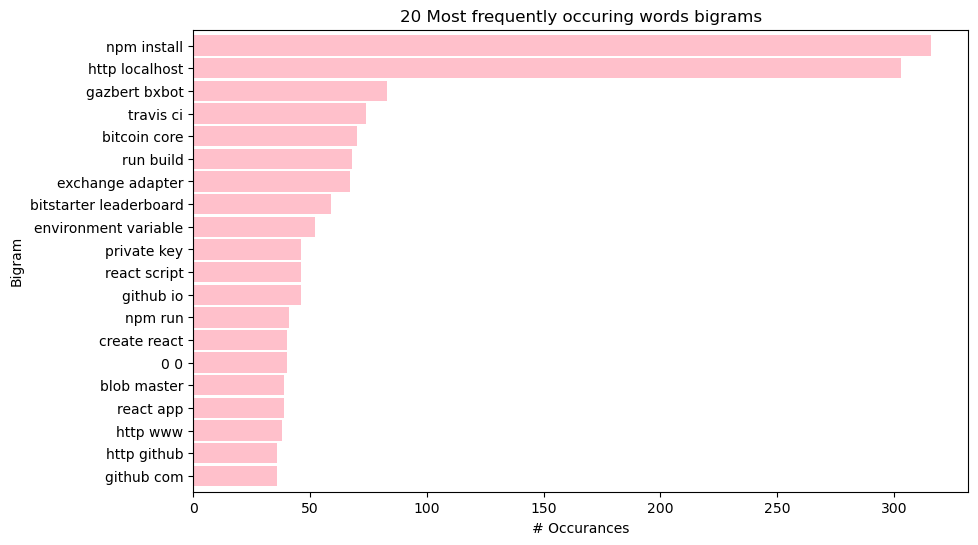

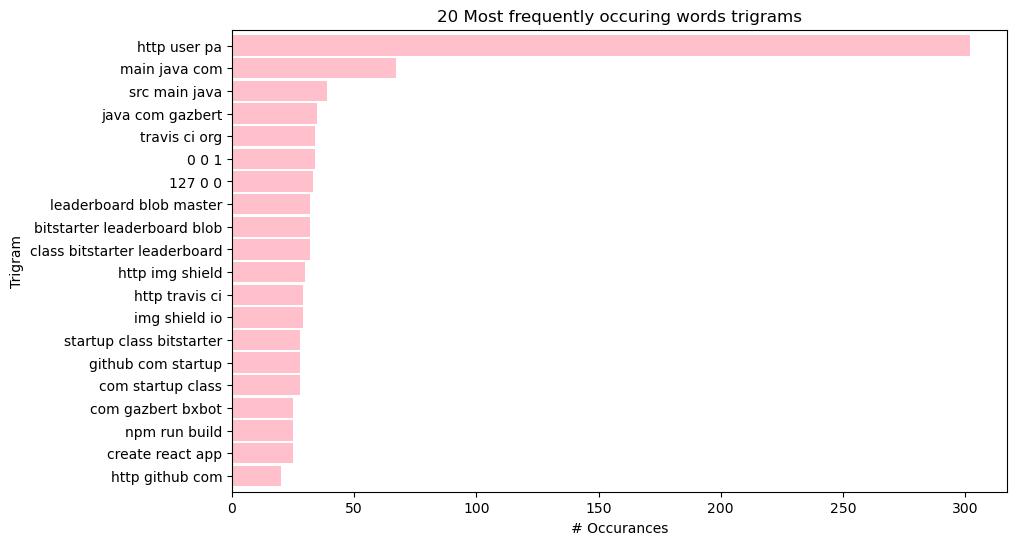

In [5]:
e.Q1(train)

#### Takeaway

#### 2. Does the length of the README vary by programming language?

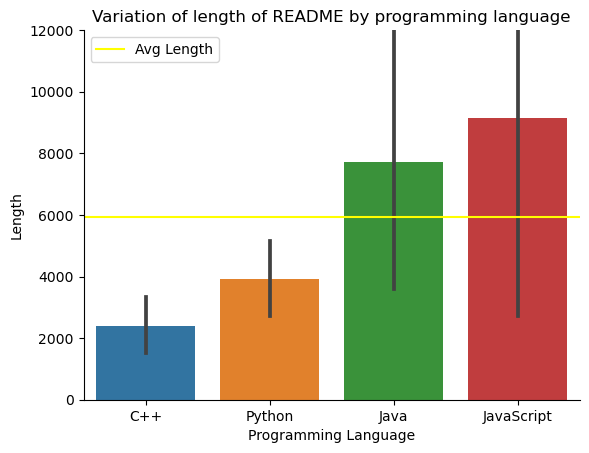

In [6]:
e.viz_length_content(train)

#### Takeaway

#### 3. Do different programming languages use a different number of unique words?

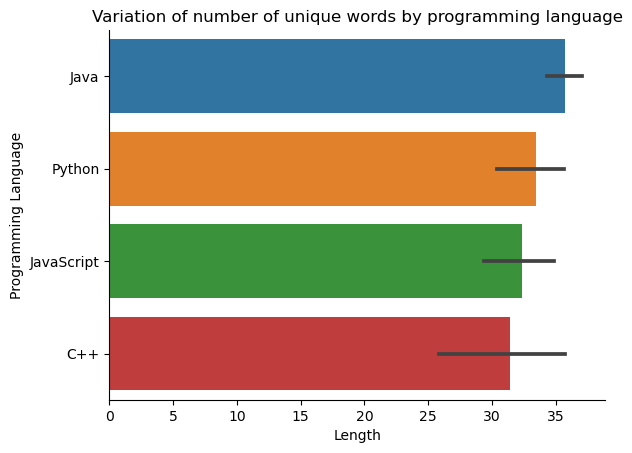

In [7]:
e.viz_count_unique(train)

#### Takeaway

In [8]:
#isolate target
X_train, y_train, X_val, y_val, X_test, y_test = w.x_y_split(df, 'language')

# Model

In [9]:
# get baseline score
m.get_baseline_accuracy(y_train)

Baseline accuracy: 39.0 %


In [10]:
X_train_tfid, X_val_tfid, X_test_tfid = m.get_tfid(X_train, X_val, X_test, y_train, y_val, y_test)

In [11]:
# get  a dataframe of models with train accuracy, validate accuracy and accuracy difference
models_df = m.get_models_accuracy(X_train_tfid, X_val_tfid, y_train, y_val)
models_df

,train_accuracy,validate_accuracy,difference
Decision_Tree,0.763158,0.76,0.003158
Random_Forest,0.631579,0.56,0.071579
KNN,0.736842,0.72,0.016842


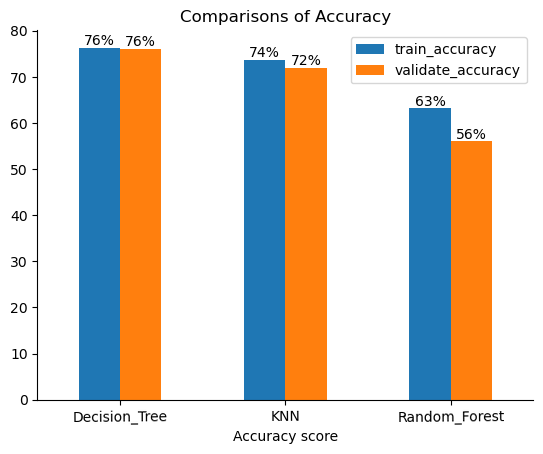

In [12]:
# get visual of models train accuracy and validate accuracy
m.viz_models_accuracy(models_df)

In [13]:
#run best model on test set
m.get_decison_tree_test(X_train_tfid, X_test_tfid, y_train, y_test, 4)

validate Accuracy: 65.0 %


# Conclusion